In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [73]:
# Use sep = ';' as the content was separated by using semicolon
df = pd.read_csv('/Users/amyhoang/Desktop/marketing_campaign.csv', sep = ';')

In [74]:
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**DATA CLEANING**

In [76]:
# Drop unnecessary columns: Z_CostContact and Z_Revenue
df = df.drop(columns=['Z_CostContact', 'Z_Revenue'])

In [77]:
# Check missing values
def missing_data(df):
    Total = df.isnull().sum().sort_values(ascending=False)
    Percent = (Total*100/df.isnull().count()).sort_values(ascending=False).round(decimals=3)
    missing_data = pd.concat([Total, Percent],axis=1,keys=["Total","Percent"])
    return missing_data[missing_data.Total>=1]
missing_data(df)

,Total,Percent
Income,24,1.071


In [78]:
# Fill Null value in income column by AVG of entire columns
df = df.fillna(df['Income'].mean())

In [79]:
missing_data(df)

,Total,Percent


In [80]:
# Create new column called "Age_Range" to find the year different from current year to 'Year_Birth'
# import datetime and use syntax below to get current year
current_year = datetime.datetime.now().year

df['Age'] = current_year - df['Year_Birth']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,4,7,0,0,0,0,0,0,1,65
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,5,0,0,0,0,0,0,0,68
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,57
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,4,6,0,0,0,0,0,0,0,38
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,4,5,0,0,0,0,0,0,0,55
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,5,7,0,0,0,1,0,0,0,76
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,13,6,0,1,0,0,0,0,0,41
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,10,3,0,0,0,0,0,0,0,66


In [81]:
# To create new column called 'Age_Range' to categorize into different age group
df.loc[df['Age'].between(26,41), 'Age_Range'] = '26-41'
df.loc[df['Age'].between(42,57), 'Age_Range'] = '42-57'
df.loc[df['Age'].between(58,67), 'Age_Range'] = '58-67'
df.loc[df['Age'].between(68,76), 'Age_Range'] = '68-76'
df.loc[df['Age'].between(77,94), 'Age_Range'] = '77-94'
df.loc[df['Age'].between(95,129),'Age_Range'] = 'over 95'

In [82]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Range
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,1,65,58-67
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,0,68,68-76
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,0,57,42-57
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,0,38,26-41
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,0,41,26-41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,0,55,42-57
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,0,76,68-76
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,0,41,26-41
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,0,66,58-67


**EDA-EXPLAINATORY DATA ANALYSIS**

In [83]:
# Group customer by Age_Range
cust_count_age=df.groupby('Age_Range').count()['ID']
cust_count_age

Age_Range
26-41       385
42-57      1069
58-67       467
68-76       292
77-94        24
over 95       3
Name: ID, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

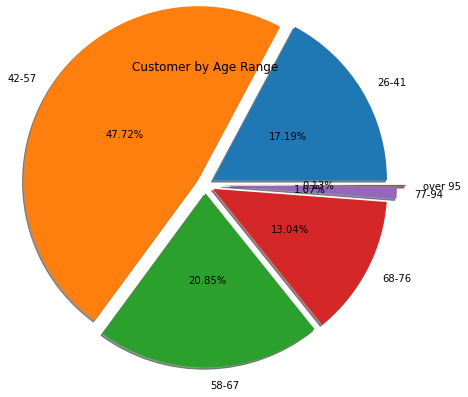

In [84]:
# explode is a list of all values, e.i: 6 values -> explode should list 6 elements, range 0.2 to 0.3 means offset the wedge 
label = df.groupby('Age_Range').count()['ID'].index

plt.axis('equal')
plt.title('Customer by Age Range')
plt.pie(cust_count_age, labels=label, shadow=True, autopct='%1.2f%%', radius=2, explode=[0.1,0.1,0.1,0.1,0.2,0.3], pctdistance=0.5)
plt.show

In [85]:
# Average spending amount of each categorical GROUP BY Age_Range
wine_spent=df.groupby('Age_Range').mean()['MntWines']

fruit_spent=df.groupby('Age_Range').mean()['MntFruits']

meat_spent=df.groupby('Age_Range').mean()['MntMeatProducts']

fish_spent=df.groupby('Age_Range').mean()['MntFishProducts']

sweet_spent=df.groupby('Age_Range').mean()['MntSweetProducts']

gold_spent=df.groupby('Age_Range').mean()['MntGoldProds']

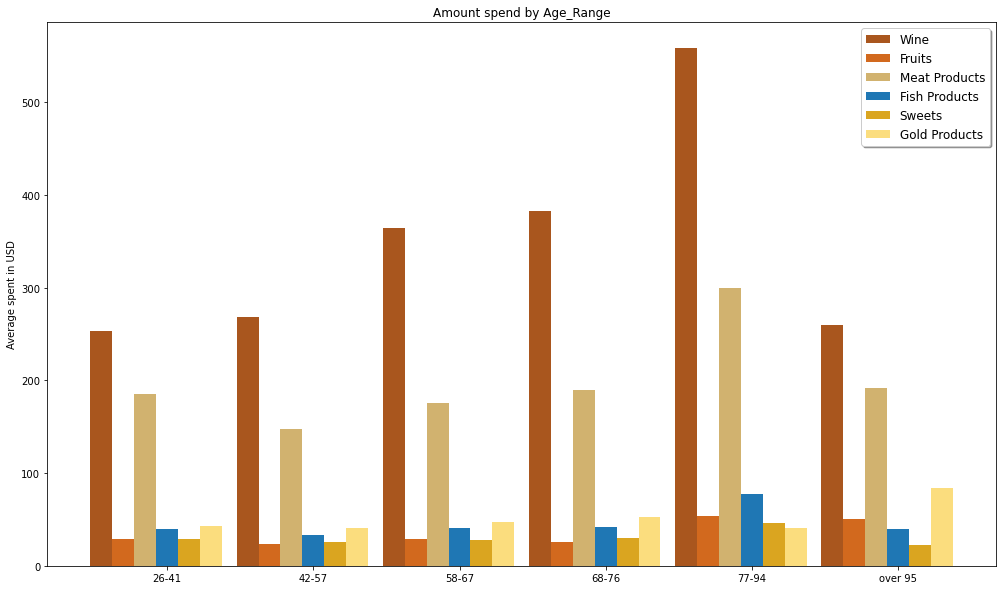

In [86]:
# xpos means position of label in the chart
xpos=np.arange(len(label))
xpos

plt.figure(figsize=(17,10))
plt.bar(xpos-0.45,wine_spent,width=0.15,label='Wine',color='#A9561E')
plt.bar(xpos-0.3,fruit_spent,width=0.15,label='Fruits',color='#D2691E')
plt.bar(xpos-0.15,meat_spent,width=0.15,label='Meat Products',color='#D1B26F')
plt.bar(xpos,fish_spent,width=0.15,label='Fish Products',color='tab:blue')
plt.bar(xpos+0.15,sweet_spent,width=0.15,label='Sweets',color='#DAA520')
plt.bar(xpos+0.3,gold_spent,width=0.15,label='Gold Products',color='#FBDD7E')

plt.xticks(xpos,label)
plt.ylabel('Average spent in USD')
plt.title('Amount spend by Age_Range')
plt.legend(loc='best',shadow=True,fontsize='large')

In [87]:
# Group customer by Education level
cust_count_edu = df.groupby('Education').count()['ID']

cust_count_edu

Education
2n Cycle       203
Basic           54
Graduation    1127
Master         370
PhD            486
Name: ID, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

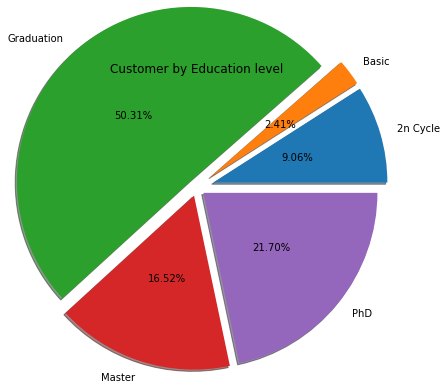

In [88]:
label = df.groupby('Education').count()['ID'].index

plt.axis('equal')
plt.title('Customer by Education level')
plt.pie(cust_count_edu, labels=label, shadow=True, autopct='%1.2f%%', radius=2, explode=[0.2,0.2,0.1,0.1,0.1], pctdistance=0.5)
plt.show

In [89]:
# Average spending amount of each categorical GROUP BY Education level
wine_spent=df.groupby('Education').mean()['MntWines']

fruit_spent=df.groupby('Education').mean()['MntFruits']

meat_spent=df.groupby('Education').mean()['MntMeatProducts']

fish_spent=df.groupby('Education').mean()['MntFishProducts']

sweet_spent=df.groupby('Education').mean()['MntSweetProducts']

gold_spent=df.groupby('Education').mean()['MntGoldProds']

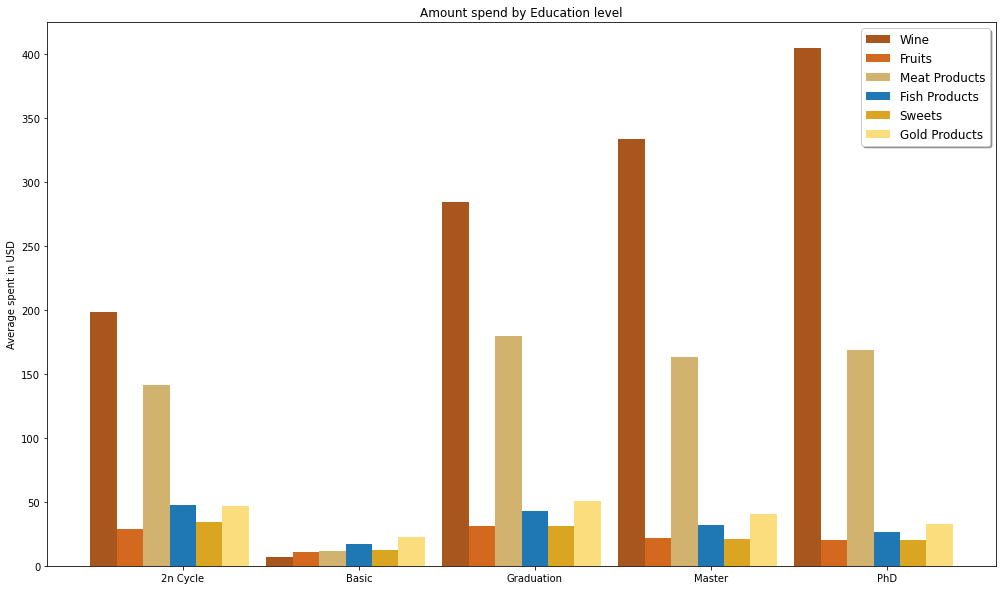

In [90]:
xpos=np.arange(len(label))
xpos

plt.figure(figsize=(17,10))
plt.bar(xpos-0.45,wine_spent,width=0.15,label='Wine',color='#A9561E')
plt.bar(xpos-0.3,fruit_spent,width=0.15,label='Fruits',color='#D2691E')
plt.bar(xpos-0.15,meat_spent,width=0.15,label='Meat Products',color='#D1B26F')
plt.bar(xpos,fish_spent,width=0.15,label='Fish Products',color='tab:blue')
plt.bar(xpos+0.15,sweet_spent,width=0.15,label='Sweets',color='#DAA520')
plt.bar(xpos+0.3,gold_spent,width=0.15,label='Gold Products',color='#FBDD7E')

plt.xticks(xpos,label)
plt.ylabel('Average spent in USD')
plt.title('Amount spend by Education level')
plt.legend(loc='best',shadow=True,fontsize='large')

In [91]:
# Group customer by Marital Status
cust_count_mar = df.groupby('Marital_Status').count()['ID']

cust_count_mar

Marital_Status
Absurd        2
Alone         3
Divorced    232
Married     864
Single      480
Together    580
Widow        77
YOLO          2
Name: ID, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

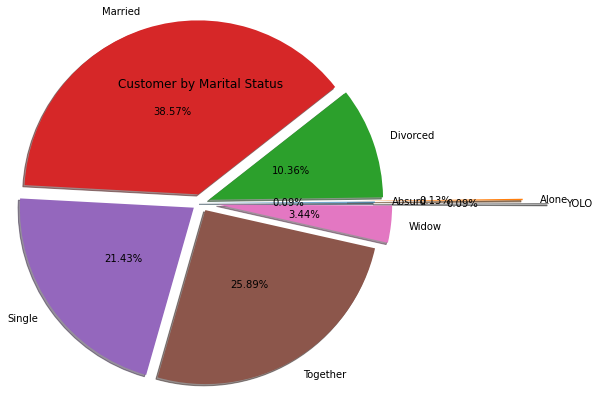

In [92]:
label = df.groupby('Marital_Status').count()['ID'].index

plt.axis('equal')
plt.title('Customer by Marital Status')
plt.pie(cust_count_mar, labels=label, shadow=True, autopct='%1.2f%%', radius=2, explode=[0,1.7,0.1,0.1,0.1,0.1,0.2,2], pctdistance=0.5)
plt.show

In [93]:
# Average spending amount of each categorical GROUP BY Marital Status
wine_spent=df.groupby('Marital_Status').mean()['MntWines']

fruit_spent=df.groupby('Marital_Status').mean()['MntFruits']

meat_spent=df.groupby('Marital_Status').mean()['MntMeatProducts']

fish_spent=df.groupby('Marital_Status').mean()['MntFishProducts']

sweet_spent=df.groupby('Marital_Status').mean()['MntSweetProducts']

gold_spent=df.groupby('Marital_Status').mean()['MntGoldProds']

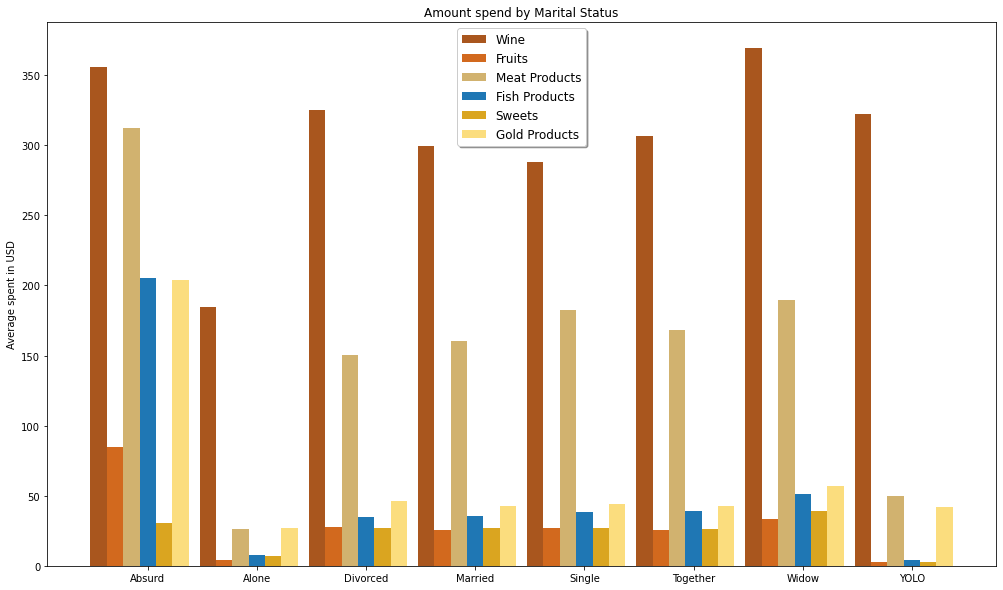

In [94]:
xpos=np.arange(len(label))
xpos

plt.figure(figsize=(17,10))
plt.bar(xpos-0.45,wine_spent,width=0.15,label='Wine',color='#A9561E')
plt.bar(xpos-0.3,fruit_spent,width=0.15,label='Fruits',color='#D2691E')
plt.bar(xpos-0.15,meat_spent,width=0.15,label='Meat Products',color='#D1B26F')
plt.bar(xpos,fish_spent,width=0.15,label='Fish Products',color='tab:blue')
plt.bar(xpos+0.15,sweet_spent,width=0.15,label='Sweets',color='#DAA520')
plt.bar(xpos+0.3,gold_spent,width=0.15,label='Gold Products',color='#FBDD7E')

plt.xticks(xpos,label)
plt.ylabel('Average spent in USD')
plt.title('Amount spend by Marital Status')
plt.legend(loc='best',shadow=True,fontsize='large')

In [95]:
# Group customer by Kid at home
cust_count_kid=df.groupby('Kidhome').count()['ID']
cust_count_kid

Kidhome
0    1293
1     899
2      48
Name: ID, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

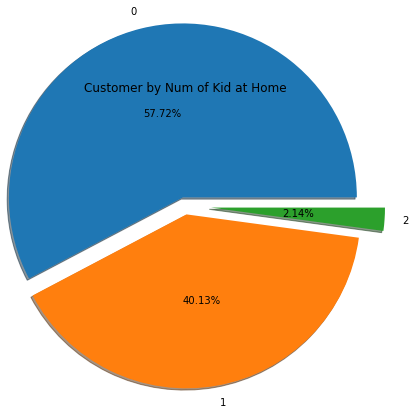

In [96]:
label = df.groupby('Kidhome').count()['ID'].index

plt.axis('equal')
plt.title('Customer by Num of Kid at Home')
plt.pie(cust_count_kid, labels=label, shadow=True, autopct='%1.2f%%', radius=2, explode=[0.1, 0.1, 0.3], pctdistance=0.5)
plt.show

In [97]:
# Average spending amount of each categorical GROUP BY Num Kid at Home
wine_spent=df.groupby('Kidhome').mean()['MntWines']

fruit_spent=df.groupby('Kidhome').mean()['MntFruits']

meat_spent=df.groupby('Kidhome').mean()['MntMeatProducts']

fish_spent=df.groupby('Kidhome').mean()['MntFishProducts']

sweet_spent=df.groupby('Kidhome').mean()['MntSweetProducts']

gold_spent=df.groupby('Kidhome').mean()['MntGoldProds']

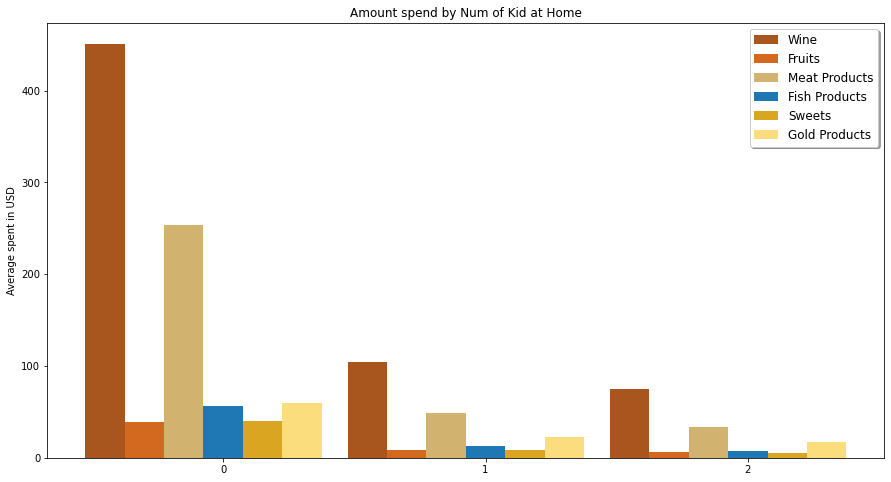

In [98]:
xpos=np.arange(len(label))
xpos

plt.figure(figsize=(15,8))
plt.bar(xpos-0.45,wine_spent,width=0.15,label='Wine',color='#A9561E')
plt.bar(xpos-0.3,fruit_spent,width=0.15,label='Fruits',color='#D2691E')
plt.bar(xpos-0.15,meat_spent,width=0.15,label='Meat Products',color='#D1B26F')
plt.bar(xpos,fish_spent,width=0.15,label='Fish Products',color='tab:blue')
plt.bar(xpos+0.15,sweet_spent,width=0.15,label='Sweets',color='#DAA520')
plt.bar(xpos+0.3,gold_spent,width=0.15,label='Gold Products',color='#FBDD7E')

plt.xticks(xpos,label)
plt.ylabel('Average spent in USD')
plt.title('Amount spend by Num of Kid at Home')
plt.legend(loc='best',shadow=True,fontsize='large')

In [99]:
# Group customer by Teen at home
cust_count_teen=df.groupby('Teenhome').count()['ID']
cust_count_teen

Teenhome
0    1158
1    1030
2      52
Name: ID, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

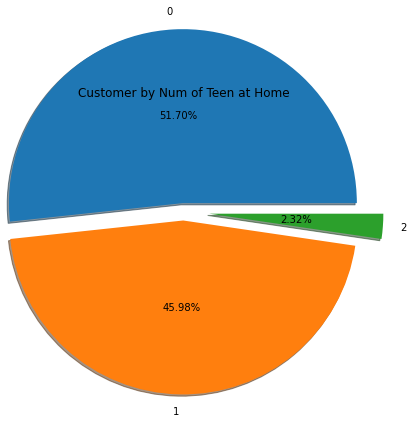

In [100]:
label = df.groupby('Teenhome').count()['ID'].index

plt.axis('equal')
plt.title('Customer by Num of Teen at Home')
plt.pie(cust_count_teen, labels=label, shadow=True, autopct='%1.2f%%', radius=2, explode=[0.1, 0.1, 0.3], pctdistance=0.5)
plt.show

In [101]:
# Average spending amount of each categorical GROUP BY Num Teen at Home
wine_spent=df.groupby('Teenhome').mean()['MntWines']

fruit_spent=df.groupby('Teenhome').mean()['MntFruits']

meat_spent=df.groupby('Teenhome').mean()['MntMeatProducts']

fish_spent=df.groupby('Teenhome').mean()['MntFishProducts']

sweet_spent=df.groupby('Teenhome').mean()['MntSweetProducts']

gold_spent=df.groupby('Teenhome').mean()['MntGoldProds']

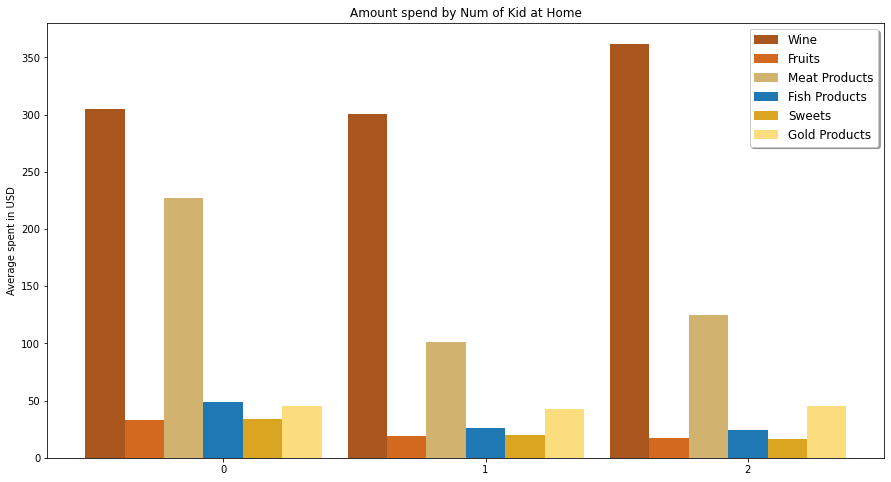

In [102]:
xpos=np.arange(len(label))
xpos

plt.figure(figsize=(15,8))
plt.bar(xpos-0.45,wine_spent,width=0.15,label='Wine',color='#A9561E')
plt.bar(xpos-0.3,fruit_spent,width=0.15,label='Fruits',color='#D2691E')
plt.bar(xpos-0.15,meat_spent,width=0.15,label='Meat Products',color='#D1B26F')
plt.bar(xpos,fish_spent,width=0.15,label='Fish Products',color='tab:blue')
plt.bar(xpos+0.15,sweet_spent,width=0.15,label='Sweets',color='#DAA520')
plt.bar(xpos+0.3,gold_spent,width=0.15,label='Gold Products',color='#FBDD7E')

plt.xticks(xpos,label)
plt.ylabel('Average spent in USD')
plt.title('Amount spend by Num of Kid at Home')
plt.legend(loc='best',shadow=True,fontsize='large')

In [103]:
# Total spending amount each ID
df['Total_Spending_Amt'] = df['MntWines'] + df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Range,Total_Spending_Amt
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,1,65,58-67,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,0,68,68-76,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,0,57,42-57,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,0,38,26-41,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,0,41,26-41,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,0,55,42-57,1341
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,0,0,76,68-76,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,0,41,26-41,1241
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,0,66,58-67,843


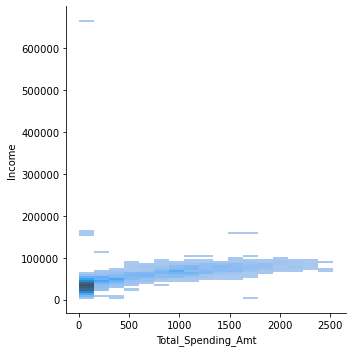

In [104]:
# Compare relationship between Income VS Amount Spending
sns.displot(data=df,x='Total_Spending_Amt',y='Income')

Text(0.5, 0, 'Income')

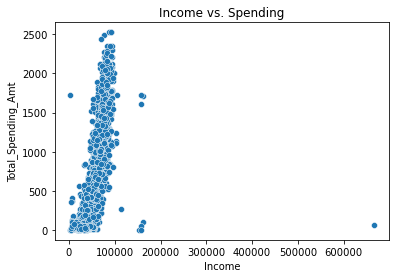

In [105]:
ax = sns.scatterplot(x="Income", y="Total_Spending_Amt", data=df)
ax.set_title("Income vs. Spending")
ax.set_xlabel("Income")

In [106]:
df.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spending_Amt
ID,1.000000,0.000028,0.013036,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,-0.021968,-0.000028,-0.018054
Year_Birth,0.000028,1.000000,-0.160942,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,0.021325,-1.000000,-0.111306
Income,0.013036,-0.160942,1.000000,-0.425176,0.019018,-0.003946,0.576789,0.428747,0.577802,0.437497,...,-0.549824,-0.016168,0.182791,0.334850,0.274921,0.087538,-0.027223,0.132756,0.160942,0.664706
Kidhome,0.002406,0.230176,-0.425176,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,-0.080008,-0.230176,-0.556669
Teenhome,-0.002580,-0.352111,0.019018,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,-0.154446,0.352111,-0.138384
Recency,-0.046524,-0.019871,-0.003946,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,-0.198437,0.019871,0.020433
MntWines,-0.022878,-0.157773,0.576789,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,0.247254,0.157773,0.891839
MntFruits,0.004600,-0.017917,0.428747,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,0.125289,0.017917,0.614229
MntMeatProducts,-0.004437,-0.030872,0.577802,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,0.236335,0.030872,0.842965
MntFishProducts,-0.024475,-0.041625,0.437497,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,0.111331,0.041625,0.642818


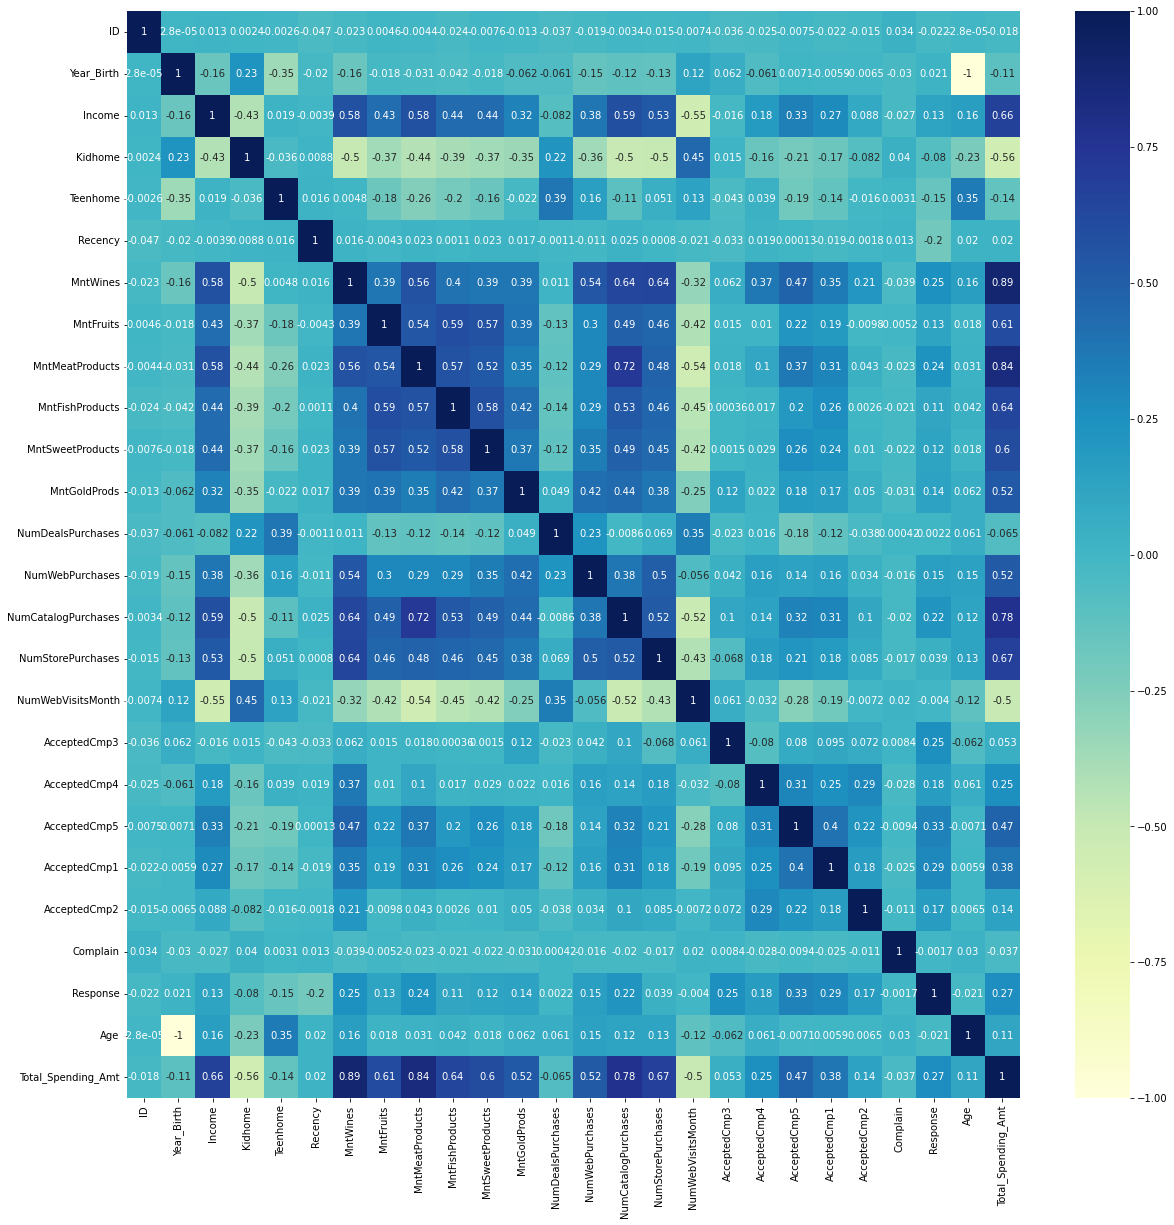

In [107]:
corr=df.corr()
plt.figure(figsize=(20,20))

sns.heatmap(corr,annot=True,cmap='YlGnBu')
plt.show()

In [108]:
# Number of customer who response & NOT response
res_count=df.groupby('Response').count()['ID']

res_count

Response
0    1906
1     334
Name: ID, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

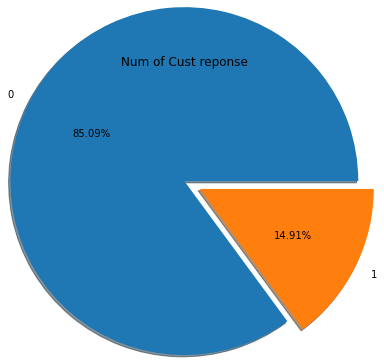

In [109]:
label =df.groupby('Response').count()['ID'].index

plt.axis('equal')
plt.title('Num of Cust reponse')
plt.pie(res_count, labels=label, shadow=True, autopct='%1.2f%%', radius=2, explode = [0,0.2])
plt.show

**Response Rate - Conversion Rate - Retention Rate Analysis**

In [110]:
# Mask the 'responded'
df.loc[df['Response'] == 1]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Range,Total_Spending_Amt
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,1,65,58-67,1617
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,0,0,0,0,0,0,1,48,42-57,46
15,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,...,0,0,1,1,0,0,1,76,68-76,1315
33,7373,1952,PhD,Divorced,46610.0,0,2,2012-10-29,8,96,...,0,0,0,0,0,0,1,70,68-76,302
39,2968,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,...,1,0,0,0,0,0,1,79,77-94,902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,7118,1957,Graduation,Married,73803.0,0,1,2012-08-01,61,833,...,1,0,0,0,0,0,1,65,58-67,1528
2198,2632,1954,Graduation,Married,50501.0,1,1,2013-06-18,10,297,...,1,0,0,0,0,0,1,68,68-76,500
2202,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,0,0,0,0,0,0,1,49,42-57,424
2221,7366,1982,Master,Single,75777.0,0,0,2013-07-04,12,712,...,0,1,1,0,0,0,1,40,26-41,1438


In [111]:
# Num of cust who responded
responded = df.loc[df['Response'] == 1]['ID'].nunique()

responded

334

In [112]:
# Response rate = Num of cust who responded / Total Cust
response_rate = round(responded /df['ID'].count()*100)

response_rate

15

In [113]:
# Assume Number of Cust that made purchase over the website that accepted the offer campaign
converted = df.loc[df['NumWebPurchases'] != 0]['ID'].nunique()

converted

2191

In [114]:
# Conversion rate = Num of converted Cust / Total Cust
conversion_rate = converted/df['ID'].nunique()*100

conversion_rate

97.8125

In [115]:
# Retained Cust who had value in Recency as making purchase recently
retained = df.loc[df['Recency'] != 0]['ID'].nunique()

retained

2212

In [116]:
# Retention rate = Retained / Converted
retention_rate = round(retained/converted,2)

retention_rate

1.01

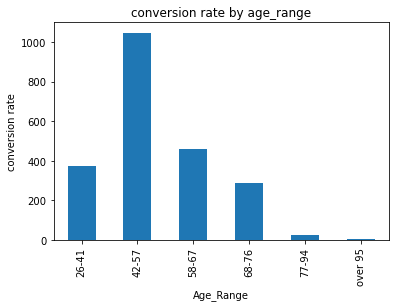

In [117]:
# EDA more about conversion rate & retention rate based on different cust segmentations

# Age_Range
converted_age=df.loc[df['NumWebPurchases'] != 0].groupby(['Age_Range'])['ID'].nunique()

converted_age.plot(kind='bar')
plt.title('conversion rate by age_range')
plt.xlabel('Age_Range')
plt.ylabel('conversion rate')
plt.show()

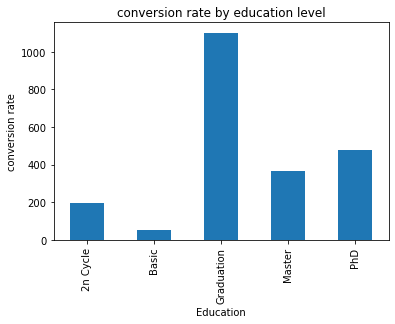

In [118]:
# Education
converted_edu=df.loc[df['NumWebPurchases'] != 0].groupby(['Education'])['ID'].nunique()

converted_edu.plot(kind='bar')
plt.title('conversion rate by education level')
plt.xlabel('Education')
plt.ylabel('conversion rate')
plt.show()

In [119]:
# Number of Kid & Teen at home
converted_kid_teen=df.loc[df['NumWebPurchases'] != 0].groupby(['Kidhome','Teenhome'])['ID'].nunique()

converted_kid_teen

Kidhome  Teenhome
0        0           620
         1           619
         2            30
1        0           493
         1           364
         2            19
2        0            16
         1            30
Name: ID, dtype: int64

In [120]:
# unstack to plot
converted_kid_teen.unstack(level=1)

Teenhome,0,1,2
Kidhome,,,
0,620.0,619.0,30.0
1,493.0,364.0,19.0
2,16.0,30.0,NaN


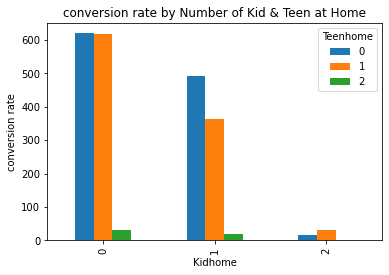

In [121]:
df_converted_kid_teen=pd.DataFrame(converted_kid_teen.unstack(level=1))

df_converted_kid_teen.plot(kind='bar')
plt.title('conversion rate by Number of Kid & Teen at Home')
plt.xlabel('Kidhome')
plt.ylabel('conversion rate')
plt.show()

**RFM Analysis - CLTV Analysis**

In [122]:
# Recency is the period btw last purchase & 'current'
df['Recency']

df.groupby('ID')['Recency'].min()

ID
0        66
1         0
9        86
13       57
17       81
         ..
11178    69
11181    85
11187    23
11188    84
11191    11
Name: Recency, Length: 2240, dtype: int64

In [123]:
# Frequency is the total number of times that cust make purchase (not including discount)
# columns: NumWebPurchases; NumCatalogPurchases; NumStorePurchases 

df['Frequency']= df['NumWebPurchases'] + df['NumCatalogPurchases']+ df['NumStorePurchases']

df['Frequency']
df.groupby('ID')['Frequency'].sum()

ID
0        16
1        17
9         7
13        4
17       24
         ..
11178     4
11181     0
11187     6
11188     6
11191     7
Name: Frequency, Length: 2240, dtype: int64

In [124]:
# Monetary = total amount spent on different product categories
# MntWines; MntFruits; MntMeatProducts; MntFishProducts; MntSweetProducts; MntGoldProds    

df['Monetary']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

df.groupby('ID')['Monetary'].sum()

ID
0        1198
1         577
9         120
13         32
17       1028
         ... 
11178      32
11181       8
11187      69
11188      89
11191     139
Name: Monetary, Length: 2240, dtype: int64

In [125]:
rfm = df.groupby('ID').agg(recency=pd.NamedAgg(column='Recency', aggfunc='min'),
                                                  frequency=pd.NamedAgg(column='Frequency', aggfunc='sum'),
                                                  monetary=pd.NamedAgg(column='Monetary', aggfunc='sum')
                                                 )
rfm

,recency,frequency,monetary
ID,,,
0,66,16,1198
1,0,17,577
9,86,7,120
13,57,4,32
17,81,24,1028
...,...,...,...
11178,69,4,32
11181,85,0,8
11187,23,6,69


In [126]:
# reset index
rfm = rfm.reset_index()

rfm

,ID,recency,frequency,monetary
0,0,66,16,1198
1,1,0,17,577
2,9,86,7,120
3,13,57,4,32
4,17,81,24,1028
...,...,...,...,...
2235,11178,69,4,32
2236,11181,85,0,8
2237,11187,23,6,69
2238,11188,84,6,89


In [127]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         2240 non-null   int64
 1   recency    2240 non-null   int64
 2   frequency  2240 non-null   int64
 3   monetary   2240 non-null   int64
dtypes: int64(4)
memory usage: 70.1 KB


In [128]:
# Rank and create score bins for each R-F-M
# Recency
rfm['r_percentile'] = rfm['recency'].rank(method='first',pct=True,ascending=True)
rfm['r_score'] = pd.qcut(rfm['r_percentile'], q=4, labels=range(4,0,-1))
rfm['r_score'].head(10)

0    2
1    4
2    1
3    2
4    1
5    1
6    1
7    1
8    4
9    3
Name: r_score, dtype: category
Categories (4, int64): [4 < 3 < 2 < 1]

In [129]:
# To count each ranking group
rfm['r_score'].value_counts()

4    560
3    560
2    560
1    560
Name: r_score, dtype: int64

In [130]:
# Frequency
rfm['f_percentile'] = rfm['frequency'].rank(method='first',pct=True,ascending=True)
rfm['f_score'] = pd.qcut(rfm['f_percentile'], q=4, labels=range(4,0,-1))
rfm['f_score'].value_counts()

4    560
3    560
2    560
1    560
Name: f_score, dtype: int64

In [131]:
# Monetary
rfm['m_percentile'] = rfm['monetary'].rank(method='first',pct=True,ascending=True)
rfm['m_score'] = pd.qcut(rfm['m_percentile'], q=4, labels=range(4,0,-1))
rfm['m_score'].value_counts()

4    560
3    560
2    560
1    560
Name: m_score, dtype: int64

In [132]:
# check dtypes of new variables
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ID            2240 non-null   int64   
 1   recency       2240 non-null   int64   
 2   frequency     2240 non-null   int64   
 3   monetary      2240 non-null   int64   
 4   r_percentile  2240 non-null   float64 
 5   r_score       2240 non-null   category
 6   f_percentile  2240 non-null   float64 
 7   f_score       2240 non-null   category
 8   m_percentile  2240 non-null   float64 
 9   m_score       2240 non-null   category
dtypes: category(3), float64(3), int64(4)
memory usage: 129.6 KB


In [133]:
# Data conversion from 'Catergory' into 'int' each score categories
rfm['r_score']=rfm['r_score'].astype(int)

In [134]:
rfm['f_score']=rfm['f_score'].astype(int)

In [135]:
rfm['m_score']=rfm['m_score'].astype(int)

In [136]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2240 non-null   int64  
 1   recency       2240 non-null   int64  
 2   frequency     2240 non-null   int64  
 3   monetary      2240 non-null   int64  
 4   r_percentile  2240 non-null   float64
 5   r_score       2240 non-null   int64  
 6   f_percentile  2240 non-null   float64
 7   f_score       2240 non-null   int64  
 8   m_percentile  2240 non-null   float64
 9   m_score       2240 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 175.1 KB


In [137]:
rfm['rfm_score'] = rfm['r_score'] + rfm['f_score'] + rfm['m_score']

rfm['rfm_score']

0        5
1        8
2        7
3       10
4        4
        ..
2235    10
2236     9
2237    10
2238     7
2239    10
Name: rfm_score, Length: 2240, dtype: int64

In [138]:
# To count each ranking group
rfm['rfm_score'].value_counts()

7     337
6     296
9     286
5     270
10    248
8     238
11    175
4     173
12    121
3      96
Name: rfm_score, dtype: int64

<AxesSubplot:ylabel='rfm_score'>

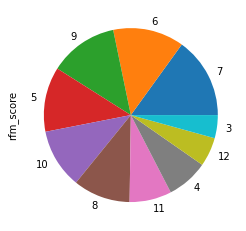

In [139]:
# Create Pie chart to show different score groups
rfm['rfm_score'].value_counts().plot(kind='pie')

In [140]:
# Create table with 2 columns 'Total Cust' & 'Total Sale' which is sum grouped by score group called 'monetary'
clv=rfm.groupby(['rfm_score']).agg(total_customers=pd.NamedAgg(column='ID', aggfunc='nunique'),
                                                  monetary=pd.NamedAgg(column='monetary', aggfunc='sum'))

clv

,total_customers,monetary
rfm_score,,
3,96,147371
4,173,221866
5,270,313329
6,296,311627
7,337,212713
8,238,75868
9,286,35536
10,248,26185
11,175,8241


In [70]:
#To calculate Customer Value = Total Cust / Total Sale
cust_avg_value = clv['monetary']/clv['total_customers']

In [ ]:
# churn means customer left the business, so Recency will be 0
left = df.loc[df['Recency'] == 0]['ID'].nunique()

left

In [ ]:
# churn rate = # of left cust divides by total num of cust
df['ID'].nunique()

churn_rate = left/df['ID'].nunique()*100

churn_rate

In [143]:
#CLV = Customer Value x Cust lifespan (1/churn rate)
clv['clv']=(clv['monetary']/clv['total_customers'])*1/churn_rate

In [144]:
clv

,total_customers,monetary,clv
rfm_score,,,
3,96,147371,1228.091667
4,173,221866,1025.969942
5,270,313329,928.382222
6,296,311627,842.235135
7,337,212713,504.956677
8,238,75868,255.018487
9,286,35536,99.401399
10,248,26185,84.467742
11,175,8241,37.673143
